In [61]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.interpolate as interpolate

atten_folder = 'D:/Research/Attenuation Data/NPY Files/'
spectra_folder = 'D:/Research/Attenuation Data/NPY Spectra/'
energies = ['40kVp', '80kVp']

# Matrices for the scattering data based on Z (rows) and E (columns)
atten_files = os.listdir(atten_folder)
num_rows = len(atten_files)
scatter_matrix = np.empty([num_rows, 17])
PE_matrix = np.empty([num_rows, 17])

# Get the energies of the attenuation data
num_energies = np.load(atten_folder + 'Z04.npy')
atten_energies = np.array(num_energies[:, 0])

Z_values = np.empty(num_rows)

# Set first column to be the Z values and populate the matrices with the corresponding data
for i, file in enumerate(atten_files):

    # Get Z value of the file
    Z_val = file.replace('Z', '')
    Z_val = Z_val.replace('.npy', '')
    Z_val = int(Z_val)

    Z_values[i] = Z_val

    # Load the file of a specific set of Z attenuation data
    data = np.load(atten_folder+file)

    # Arrays to store the scattering and PE values of each energy in the atten_energies array
    scatter_G = np.empty(len(atten_energies))
    PE_F = np.empty(len(atten_energies))

    # Find the energy values in each file and export their scatter and PE values
    for j, energy in enumerate(atten_energies):
        energy_ind = np.argwhere(data[:, 0] == energy)
        scatter_G[j] = float(data[energy_ind, 1])
        PE_F[j] = float(data[energy_ind, 2])

    scatter_matrix[i, 0:] = scatter_G
    PE_matrix[i, 0:] = PE_F

atten_energies = np.array(atten_energies, dtype='float')

# Function that will interpolate F (photoelectric) based on the input energy and Z-value
# Call using F(E, Z) (E and Z can be arrays)
F = interpolate.interp2d(atten_energies, Z_values, PE_matrix, kind='linear')

# Function that will interpolate G (scattering) based on the input energy and Z-value
# Call using G(E, Z) (E and Z can be arrays)
G = interpolate.interp2d(atten_energies, Z_values, scatter_matrix, kind='linear')


spectra_file_low = 'IMAGING_' + energies[0] + '_Spectra.npy'
spectra_file_high = 'IMAGING_' + energies[1] + '_Spectra.npy'

spectra_data_low = np.load(spectra_folder+spectra_file_low)
spectra_data_high = np.load(spectra_folder+spectra_file_high)

# Load the spectra information
spectra_energies = []  # Lower energy
spectra_weights_low = []  # Lower energy
spectra_weights_high = []  # Higher energy

# Get rid of the bin edges, just take the mid energy value and the number of photons in the bin
for m in np.arange(2, len(spectra_data_low), 3):
    spectra_energies.append(spectra_data_low[m, 0])
    
    spectra_weights_low.append(spectra_data_low[m, 1])
    spectra_weights_high.append(spectra_data_high[m, 1])

spectra_energies.append(spectra_data_low[len(spectra_data_low)-2, 0])

spectra_weights_low.append(spectra_data_low[len(spectra_data_low)-2, 1])
spectra_weights_high.append(spectra_data_high[len(spectra_data_high) - 2, 1])

spectra_energies_low = np.array(spectra_energies)

spectra_weights_low = np.array(spectra_weights_low)
spectra_weights_high = np.array(spectra_weights_high)

# Normalize the weights
sum_low = np.sum(spectra_weights_low)
sum_high = np.sum(spectra_weights_high)

spectra_weights_low = np.divide(spectra_weights_low, sum_low)
spectra_weights_high = np.divide(spectra_weights_high, sum_high)


In [62]:

zpts = np.linspace(4, 30, 1000)
fpts = F(0.04567, zpts)


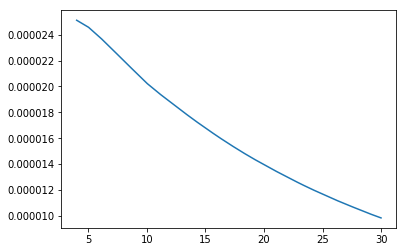

In [63]:
plt.plot(zpts, fpts)
plt.show()


In [70]:
# New interpolation
new_Zval = np.tile(Z_values, (17,1))
new_energies = np.tile(atten_energies, (17,1))

new_F = interpolate.CloughTocher2DInterpolator()

print(new_energies)


[[0.001  0.0015 0.002  0.003  0.004  0.005  0.006  0.008  0.01   0.015
  0.02   0.03   0.04   0.05   0.06   0.08   0.1   ]
 [0.001  0.0015 0.002  0.003  0.004  0.005  0.006  0.008  0.01   0.015
  0.02   0.03   0.04   0.05   0.06   0.08   0.1   ]
 [0.001  0.0015 0.002  0.003  0.004  0.005  0.006  0.008  0.01   0.015
  0.02   0.03   0.04   0.05   0.06   0.08   0.1   ]
 [0.001  0.0015 0.002  0.003  0.004  0.005  0.006  0.008  0.01   0.015
  0.02   0.03   0.04   0.05   0.06   0.08   0.1   ]
 [0.001  0.0015 0.002  0.003  0.004  0.005  0.006  0.008  0.01   0.015
  0.02   0.03   0.04   0.05   0.06   0.08   0.1   ]
 [0.001  0.0015 0.002  0.003  0.004  0.005  0.006  0.008  0.01   0.015
  0.02   0.03   0.04   0.05   0.06   0.08   0.1   ]
 [0.001  0.0015 0.002  0.003  0.004  0.005  0.006  0.008  0.01   0.015
  0.02   0.03   0.04   0.05   0.06   0.08   0.1   ]
 [0.001  0.0015 0.002  0.003  0.004  0.005  0.006  0.008  0.01   0.015
  0.02   0.03   0.04   0.05   0.06   0.08   0.1   ]
 [0.001  0.0015 

In [71]:
print(np.random.rand(10, 2))

[[0.21777496 0.8804921 ]
 [0.4198134  0.43041649]
 [0.08315505 0.68421309]
 [0.70542589 0.29396744]
 [0.3347055  0.34992288]
 [0.76429371 0.41978744]
 [0.43334208 0.694158  ]
 [0.05546768 0.20521486]
 [0.15898387 0.76870281]
 [0.68505781 0.1856982 ]]
